In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import figure
from ipywidgets import widgets
from scipy.stats import norm

In [4]:
class Option:
    def __init__(self, s, k, r, v, t):
        self.s = s
        self.k = k
        self.r = r
        self.v = v
        self.t = t/360
        
    def d_j(self, j):
        s, k, r, v, t = self.s, self.k, self.r, self.v, self.t
        d1 = (math.log(s/k)+(r+0.5*v*v)*t)/(v*t)
        if j==1:
            return d1
        else:
            return d1-v*math.sqrt(t)

    def vanilla_call_price(self):
        '''
        s: stock price
        k: strike price
        r: risk free rate
        v: volatility
        t: time to maturity
        '''
        s, k, r, v, t = self.s, self.k, self.r, self.v, self.t
        
        d1 = self.d_j(1)
        d2 = self.d_j(2)
        return s*norm.cdf(d1) - math.exp(-r*t)*k*norm.cdf(d2)

call = Option(30, 25, 0.05, 0.06, 30)
call.vanilla_call_price()

5.103949953872252

### $$c(t) = S(t)N(d_1) - e^{-r(T-t)}XN(d_2)$$

### $$d_1 = \frac{ln\left(\frac{S(t)}{x}\right) + (r+\frac{1}{2}\sigma^2)(T-t)}{\sigma\sqrt{T-t}}$$

### $$d_2 = d_1 - \sigma\sqrt{T-t}$$

In [ ]:
intervals = 20
stock_prices = np.linspace(20,30,num=intervals)
call_prices = np.zeros(intervals)
for i in range(len(stock_prices)):
    s = stock_prices[i]
    call = Option(s, 25, 0.05, 0.06, 30)
    call_prices[i]=call.vanilla_call_price()
plt.plot(stock_prices, call_prices)
plt.show()

In [ ]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999

FloatSlider(value=60.0, max=360.0, min=1.0, step=1.0)

<IPython.core.display.Javascript object>


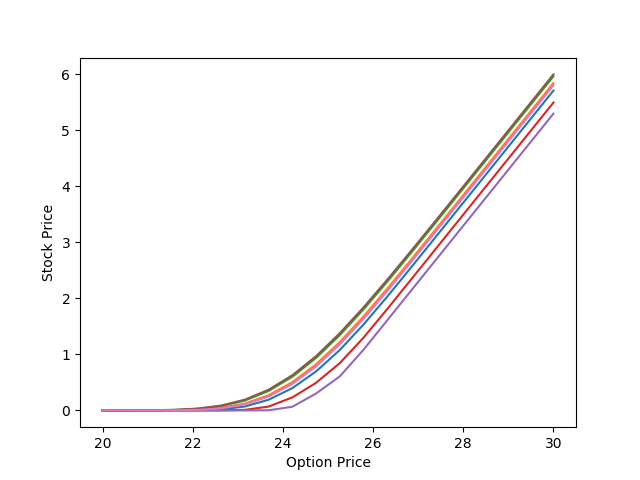

In [5]:
%matplotlib notebook
slider = widgets.FloatSlider(
    value=60,
    min=1,
    max=360,
    step=1
)

def option_prices(change):
    t = change.new
    intervals = 20
    stock_prices = np.linspace(20,30,num=intervals)
    call_prices = np.zeros(intervals)
    for i in range(len(stock_prices)):
        s = stock_prices[i]
        call = Option(s, 25, 0.05, 0.06, t)
        call_prices[i]=call.vanilla_call_price()
    plt.plot(stock_prices, call_prices)
    plt.xlabel('Option Price')
    plt.ylabel('Stock Price')
t=slider.value
slider.observe(option_prices, 'value')
slider